In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
sns.set_style("whitegrid")

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
lab_desktop = False

if lab_desktop : 
    path = '/home/INT/mifsud.l/Bureau/results'
    laminar_info_path = '/home/INT/mifsud.l/Bureau/Lists&Documentation/laminar_info/docs/TommyLaminarInfo.xlsx'
    session = 't150327002'

else : 
    path = '/home/laurie/Bureau/pattern_classification/results/classif_new_data'
    laminar_info_path = '/home/laurie/Bureau/pattern_classification/data/Tommy_new/TommyLaminarInfo.xlsx'

    session = 't150204001'
    
acc_df = pd.read_csv(f'{path}/{session}_LogReg_rate_time_reso.csv')
acc_df_sync = pd.read_csv(f'{path}/{session}_LogReg_sync_time_reso.csv')
laminar_info = pd.read_excel(laminar_info_path)

In [5]:
acc_df.head()

,Unnamed: 0,split,data_type,period,probe,target_type,accuracy,y_true,y_pred
0,0,0,test,Touch_time,P1/P2,trial_type,0.722222,[3 3 1 1 2 3 3 2 1 1 2 2 3 1 2 1 1 2 1 1 1 3 1...,[1 2 1 1 2 3 3 2 1 2 3 2 1 1 2 1 1 2 1 1 3 3 3...
1,1,0,shuff,Touch_time,P1/P2,trial_type,0.416667,[3 3 1 1 2 3 3 2 1 1 2 2 3 1 2 1 1 2 1 1 1 3 1...,[1 3 3 3 1 3 2 2 1 3 1 2 3 1 1 2 1 3 1 1 1 2 3...
2,2,0,test,Touch_time,P1/P2,position,0.222222,[3 2 2 4 3 4 2 3 2 4 4 2 3 3 2 3 2 2 3 3 3 4 2...,[2 2 2 3 3 3 4 4 3 2 2 4 4 3 3 4 4 4 2 3 2 3 3...
3,3,0,shuff,Touch_time,P1/P2,position,0.444444,[3 2 2 4 3 4 2 3 2 4 4 2 3 3 2 3 2 2 3 3 3 4 2...,[3 2 4 2 2 2 4 3 4 4 4 3 4 2 2 3 2 4 4 4 2 4 4...
4,4,0,test,Touch_time,P1/P2,type_and_pos,0.111111,[7 6 0 2 4 8 6 4 0 2 5 3 7 1 3 1 0 3 1 1 1 8 0...,[2 3 2 4 4 7 5 5 2 4 6 8 2 2 4 2 8 4 0 1 6 7 7...


In [6]:
acc_df_sync.head()

,Unnamed: 0,split,data_type,period,sigma,probe,target_type,accuracy,y_true,y_pred
0,0,0,test,Touch_time,50,P1/P2,trial_type,0.861111,[3 3 3 3 1 1 1 2 2 2 1 1 1 3 2 2 3 2 2 1 1 1 1...,[3 1 3 1 1 1 1 2 2 2 1 1 1 1 2 2 2 2 2 1 1 1 1...
1,1,0,shuff,Touch_time,50,P1/P2,trial_type,0.388889,[3 3 3 3 1 1 1 2 2 2 1 1 1 3 2 2 3 2 2 1 1 1 1...,[3 1 1 1 1 2 2 1 2 2 3 2 1 3 2 3 1 1 2 1 3 2 2...
2,2,0,test,Touch_time,50,P1/P2,position,0.277778,[3 2 4 3 4 3 4 3 4 3 4 3 2 2 3 3 4 2 2 3 4 4 3...,[4 2 2 3 3 3 2 4 2 2 2 2 4 3 2 3 3 3 2 2 4 2 2...
3,3,0,shuff,Touch_time,50,P1/P2,position,0.277778,[3 2 4 3 4 3 4 3 4 3 4 3 2 2 3 3 4 2 2 3 4 4 3...,[4 4 4 2 2 3 3 2 2 4 4 2 2 2 4 4 4 3 2 3 2 2 2...
4,4,0,test,Touch_time,50,P1/P2,type_and_pos,0.277778,[7 6 8 7 2 1 2 4 5 4 2 1 0 6 4 4 8 3 3 1 2 2 1...,[8 0 8 7 1 1 0 3 4 5 0 0 2 1 3 4 3 4 3 2 0 0 2...


In [8]:
data_list = [acc_df, acc_df_sync]
periods_names = acc_df['period'].unique().tolist()
laminar_info = laminar_info[laminar_info['Session'] == session]

    
for data in data_list:
    data.drop(columns='Unnamed: 0', inplace=True)
    data.rename(columns={"period": "Task periods", "score" : "accuracy"}, inplace=True)
    data.replace(to_replace = periods_names, value=['Touch', 'Sel', 'Sel off', 'SC1', 'SC1 off', 'SC2', 'SC2 off', 'SC3', 'SC3 off', 'Go'], inplace=True)

    
laminar_info = laminar_info[laminar_info['Session'] == session].drop(columns='Layer_Info')
P1 = laminar_info['Probe_Area'][laminar_info['Probe_Num'] == 1.0].values[0]
P2 = laminar_info['Probe_Area'][laminar_info['Probe_Num'] == 2.0].values[0]
acc_df.replace(to_replace = ['P1/P2', 'P1', 'P2'], value=[f'{P1}/{P2}', P1, P2], inplace=True)
acc_df_sync.replace(to_replace = ['P1/P2', 'P1/P1', 'P2/P2'], value=[f'{P1}/{P2}', f'{P1}/{P1}', f'{P2}/{P2}'], inplace=True)

In [9]:
acc_df

,split,data_type,Task periods,probe,target_type,accuracy,y_true,y_pred
0,0,test,Touch,PMd/M1,trial_type,0.722222,[3 3 1 1 2 3 3 2 1 1 2 2 3 1 2 1 1 2 1 1 1 3 1...,[1 2 1 1 2 3 3 2 1 2 3 2 1 1 2 1 1 2 1 1 3 3 3...
1,0,shuff,Touch,PMd/M1,trial_type,0.416667,[3 3 1 1 2 3 3 2 1 1 2 2 3 1 2 1 1 2 1 1 1 3 1...,[1 3 3 3 1 3 2 2 1 3 1 2 3 1 1 2 1 3 1 1 1 2 3...
2,0,test,Touch,PMd/M1,position,0.222222,[3 2 2 4 3 4 2 3 2 4 4 2 3 3 2 3 2 2 3 3 3 4 2...,[2 2 2 3 3 3 4 4 3 2 2 4 4 3 3 4 4 4 2 3 2 3 3...
3,0,shuff,Touch,PMd/M1,position,0.444444,[3 2 2 4 3 4 2 3 2 4 4 2 3 3 2 3 2 2 3 3 3 4 2...,[3 2 4 2 2 2 4 3 4 4 4 3 4 2 2 3 2 4 4 4 2 4 4...
4,0,test,Touch,PMd/M1,type_and_pos,0.111111,[7 6 0 2 4 8 6 4 0 2 5 3 7 1 3 1 0 3 1 1 1 8 0...,[2 3 2 4 4 7 5 5 2 4 6 8 2 2 4 2 8 4 0 1 6 7 7...
...,...,...,...,...,...,...,...,...
8995,49,shuff,Go,M1,trial_type,0.333333,[3 1 2 3 3 1 1 3 2 2 1 1 1 1 3 2 1 1 2 1 3 3 3...,[2 2 2 3 3 1 1 2 1 1 3 3 1 3 1 3 3 2 1 2 3 2 1...
8996,49,test,Go,M1,position,0.500000,[4 3 2 4 4 4 2 2 2 2 4 3 2 3 3 3 4 3 4 2 2 3 3...,[4 4 2 3 3 4 4 2 2 2 2 2 3 2 4 3 3 3 4 2 2 3 2...
8997,49,shuff,Go,M1,position,0.194444,[4 3 2 4 4 4 2 2 2 2 4 3 2 3 3 3 4 3 4 2 2 3 3...,[2 2 4 3 3 2 2 4 4 3 3 2 3 3 3 2 2 4 2 2 3 4 2...
8998,49,test,Go,M1,type_and_pos,0.333333,[8 1 3 8 8 2 0 6 3 3 2 1 0 1 7 4 2 1 5 0 6 7 7...,[2 5 6 7 7 2 1 6 3 3 1 6 1 0 8 7 1 1 2 5 6 1 8...


In [10]:
acc_df_sync

,split,data_type,Task periods,sigma,probe,target_type,accuracy,y_true,y_pred
0,0,test,Touch,50,PMd/M1,trial_type,0.861111,[3 3 3 3 1 1 1 2 2 2 1 1 1 3 2 2 3 2 2 1 1 1 1...,[3 1 3 1 1 1 1 2 2 2 1 1 1 1 2 2 2 2 2 1 1 1 1...
1,0,shuff,Touch,50,PMd/M1,trial_type,0.388889,[3 3 3 3 1 1 1 2 2 2 1 1 1 3 2 2 3 2 2 1 1 1 1...,[3 1 1 1 1 2 2 1 2 2 3 2 1 3 2 3 1 1 2 1 3 2 2...
2,0,test,Touch,50,PMd/M1,position,0.277778,[3 2 4 3 4 3 4 3 4 3 4 3 2 2 3 3 4 2 2 3 4 4 3...,[4 2 2 3 3 3 2 4 2 2 2 2 4 3 2 3 3 3 2 2 4 2 2...
3,0,shuff,Touch,50,PMd/M1,position,0.277778,[3 2 4 3 4 3 4 3 4 3 4 3 2 2 3 3 4 2 2 3 4 4 3...,[4 4 4 2 2 3 3 2 2 4 4 2 2 2 4 4 4 3 2 3 2 2 2...
4,0,test,Touch,50,PMd/M1,type_and_pos,0.277778,[7 6 8 7 2 1 2 4 5 4 2 1 0 6 4 4 8 3 3 1 2 2 1...,[8 0 8 7 1 1 0 3 4 5 0 0 2 1 3 4 3 4 3 2 0 0 2...
...,...,...,...,...,...,...,...,...,...
8995,49,shuff,Go,50,M1/M1,trial_type,0.583333,[1 2 3 3 3 1 3 1 1 1 3 2 2 2 2 2 1 2 2 1 1 3 2...,[1 1 3 1 1 1 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 1 1...
8996,49,test,Go,50,M1/M1,position,0.611111,[4 2 4 4 4 3 2 4 4 2 2 2 3 2 2 4 4 4 4 3 3 2 3...,[4 2 4 4 4 4 2 4 4 2 4 2 3 3 2 3 4 4 2 3 4 2 4...
8997,49,shuff,Go,50,M1/M1,position,0.388889,[4 2 4 4 4 3 2 4 4 2 2 2 3 2 2 4 4 4 4 3 3 2 3...,[3 4 3 2 4 4 3 2 3 2 2 3 4 4 4 4 2 4 4 3 2 2 3...
8998,49,test,Go,50,M1/M1,type_and_pos,0.444444,[2 3 8 8 8 1 6 2 2 0 6 3 4 3 3 5 2 5 5 1 1 6 4...,[2 0 2 0 8 5 6 0 2 6 8 3 1 3 6 4 2 5 3 1 2 6 4...


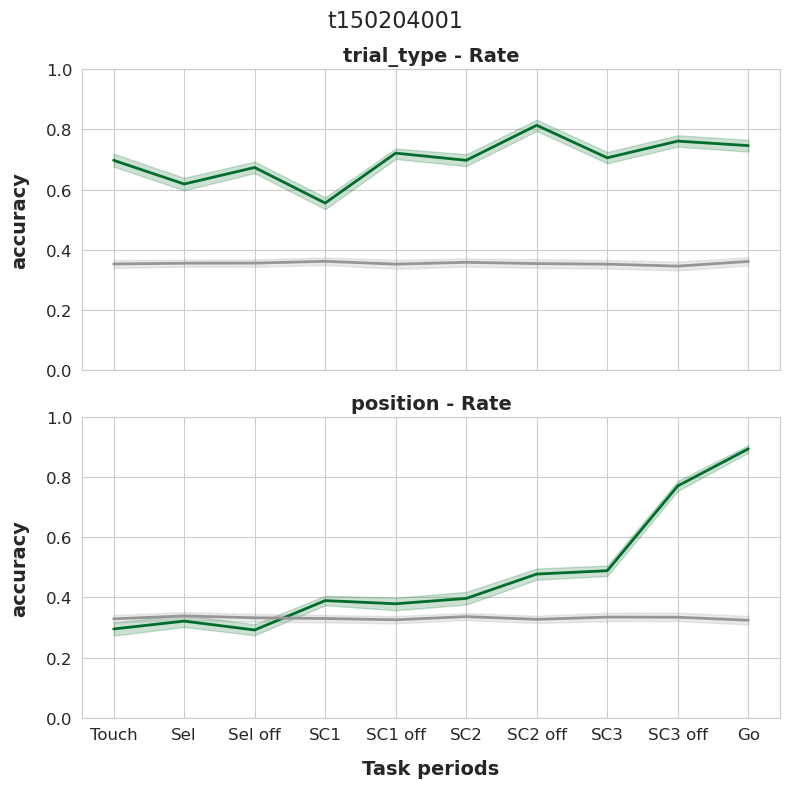

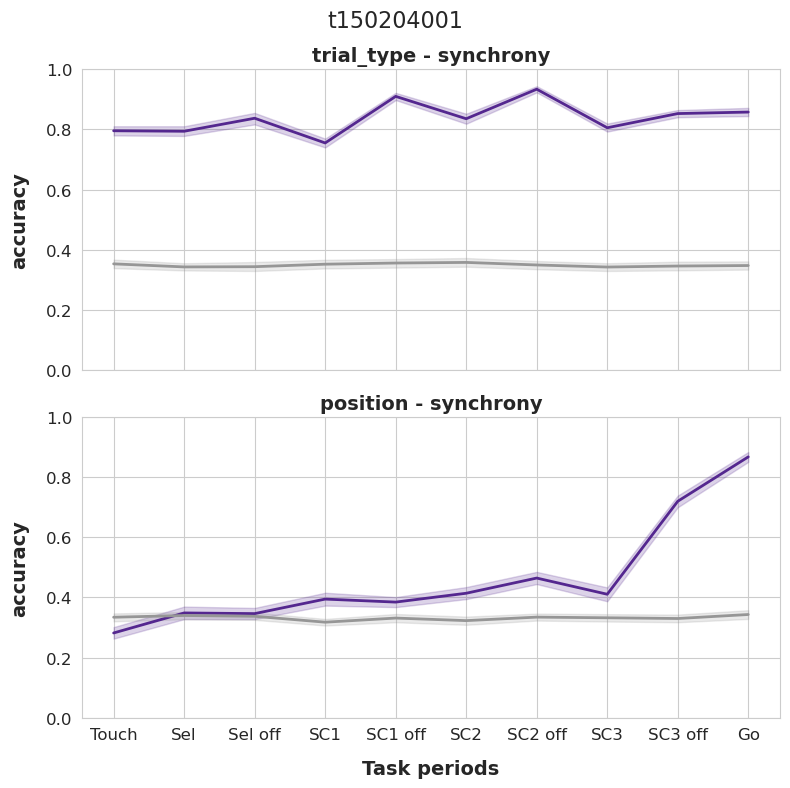

In [11]:
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelpad"] = 12
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12 

target_list = ['trial_type', 'position']

palette_prob_spk = ['#006d2c', '#2ca25f', '#66c2a4']
color_shuff = '#969696'
palette_prob_sync = ['#54278f', '#756bb1', '#9e9ac8']


### Plot Firing rate ### 
spk_accuracy = acc_df

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test') & (accuracy_plot["probe"] == f'{P1}/{P2}')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', color=palette_prob_spk[0], linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - Rate', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    
plt.subplots_adjust(top=0.9)  
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()
#plt.savefig(f'{path}/{session}_LogReg_rate_merged_probes_time_reso.png')

### Plot Synchony### 

spk_accuracy = acc_df_sync

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test') & (accuracy_plot["probe"] == f'{P1}/{P2}')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy',color=palette_prob_sync[0], linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - synchrony', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    
    
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()

#plt.savefig(f'{path}/{session}_LogReg_sync_merged_probes_time_reso.png')

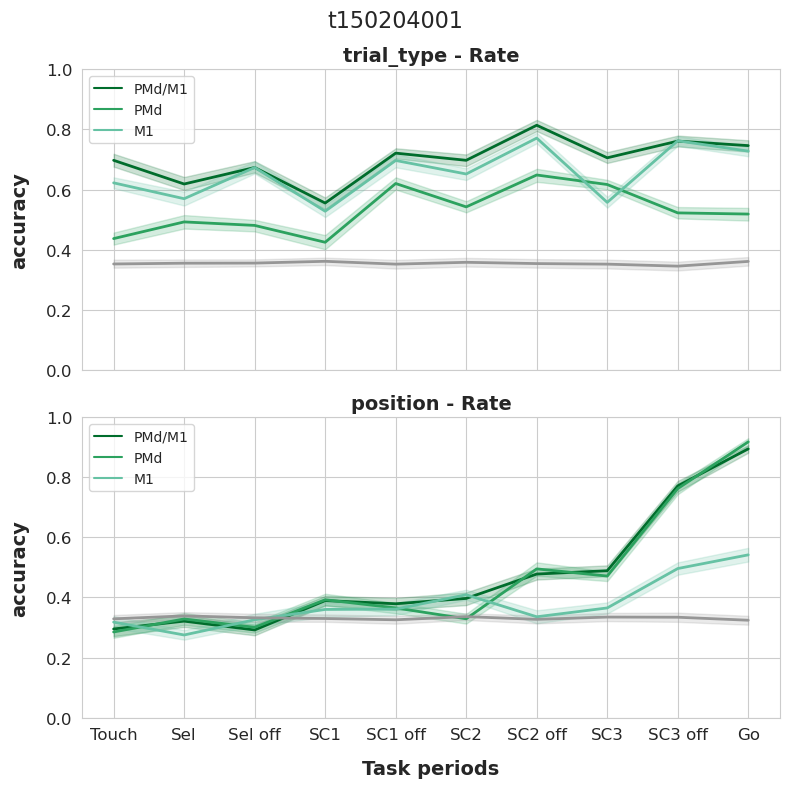

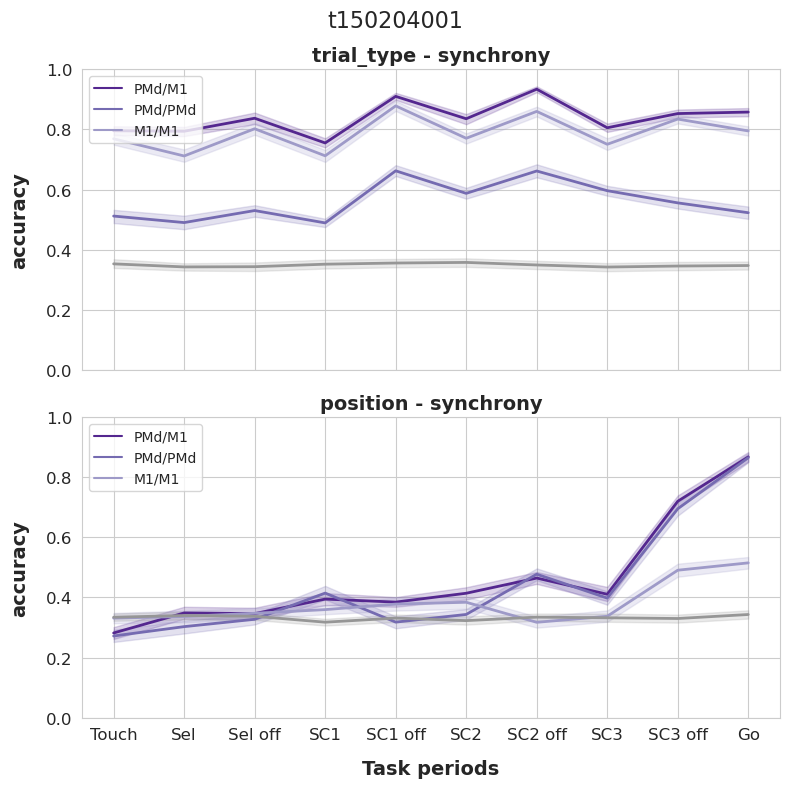

In [12]:
### Plot Firing rate ### 
spk_accuracy = acc_df

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', hue='probe', palette=palette_prob_spk, linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - Rate', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    axs[i].legend(loc='upper left')
    
plt.subplots_adjust(top=0.9)  
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()
plt.savefig(f'{path}/{session}_LogReg_rate_time_reso.png')


### Plot Synchony### 

spk_accuracy = acc_df_sync

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', hue='probe', palette=palette_prob_sync, linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - synchrony', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    axs[i].legend(loc='upper left')
    
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()

plt.savefig(f'{path}/{session}_LogReg_sync_times_reso.png')
